# Analyzing Time-Series Data

1. Import Libraries
2. Import Data
3. Preparing Data
4. Decomposition
5. Checking Stationarity and Autocorrelation

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 2 Import Data

In [2]:
path = r'C:\Users\benar\CareerFoundry\01-2024 IMDB Movies Analysis'

In [3]:
# Date was modified in excel to enable easier reformatting into datetime.
df_mov = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Movies_clean_date.csv'))

In [4]:
df_mov.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1/1/1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1/1/1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1/1/1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1/1/1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1/1/1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


# 3 Preparing Data

In [5]:
# Making subset of year and gross for easier time-series analysis. Choosing sum of gross as a curosity
sub1 = df_mov[['year', 'gross']].groupby(['year'], as_index=False).agg('sum')
sub1

,year,gross
0,1/1/1980,2.650855e+09
1,1/1/1981,2.654110e+09
2,1/1/1982,3.259531e+09
3,1/1/1983,2.914588e+09
4,1/1/1984,3.616694e+09
5,1/1/1985,3.890001e+09
6,1/1/1986,3.731430e+09
7,1/1/1987,4.104376e+09
8,1/1/1988,4.918452e+09
9,1/1/1989,6.172209e+09


In [6]:
# Removing 2020 data because there are so few observations for that year.
sub1 = sub1.loc[(sub1['year'] <= '1/1/2019')]
sub1

,year,gross
0,1/1/1980,2.650855e+09
1,1/1/1981,2.654110e+09
2,1/1/1982,3.259531e+09
3,1/1/1983,2.914588e+09
4,1/1/1984,3.616694e+09
5,1/1/1985,3.890001e+09
6,1/1/1986,3.731430e+09
7,1/1/1987,4.104376e+09
8,1/1/1988,4.918452e+09
9,1/1/1989,6.172209e+09


In [7]:
# setting index to datetime
sub1['datetime'] = pd.to_datetime(sub1['year'])
sub1 = sub1.set_index('datetime')
sub1.drop(['year'], axis=1, inplace=True)
sub1.head()

C:\Users\benar\AppData\Local\Temp\ipykernel_21856\3321637512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['datetime'] = pd.to_datetime(sub1['year'])


,gross
datetime,
1980-01-01,2.650855e+09
1981-01-01,2.654110e+09
1982-01-01,3.259531e+09
1983-01-01,2.914588e+09
1984-01-01,3.616694e+09


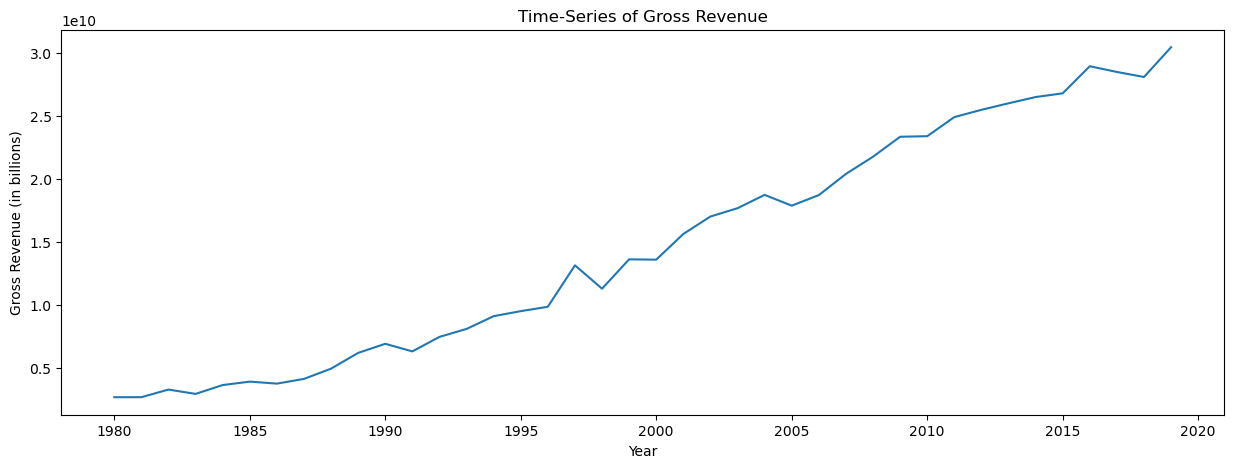

In [14]:
plt.figure(figsize=(15,5), dpi=100)
plt.title ('Time-Series of Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (in billions)')
plt.plot(sub1)

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'time_series_gross.png'))

Besides one major spike in 1997, the trend seems to be very steady upward

# 4 Decomposition

In [9]:
# decompose data using additive model
decomposition = sm.tsa.seasonal_decompose(sub1, model='additive')

In [10]:
rcParams['figure.figsize'] = 18, 7

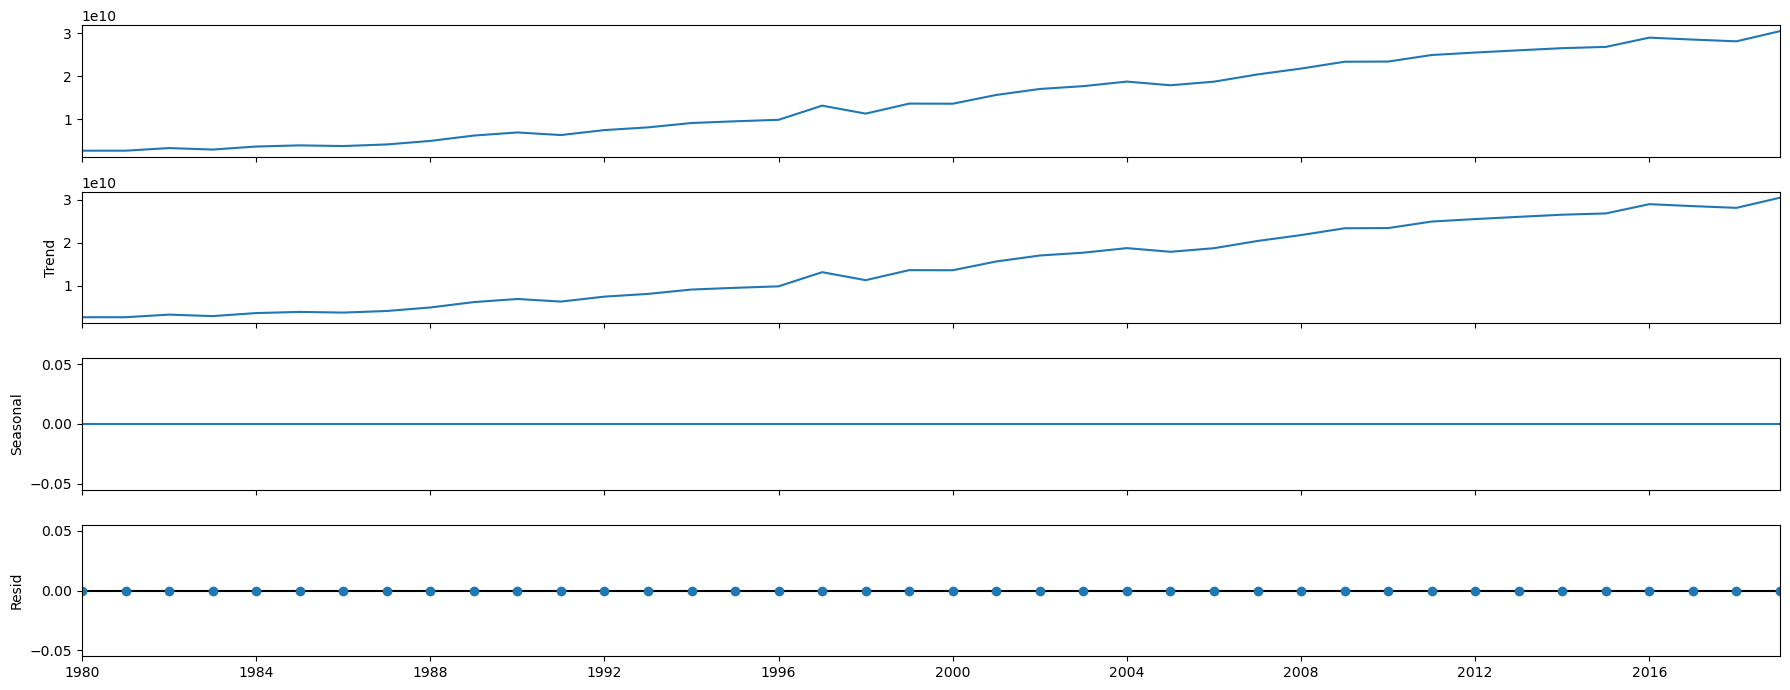

In [11]:
# Plot the separate components

decomposition.plot()

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'time_series_decomposition_gross.png'))

plt.show()

No seasonality in the chart, but that makes sense since this is only yearly data. There's also not much noise in the data at all

# 5 Checking Stationarity and Autocorrelation

In [12]:
# Dickey-Fuller test
def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(sub1['gross'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.001146
p-value                         0.994278
Number of Lags Used             1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


The Test Statistic is larger than all critical values, so there is no unit root and we can reject the null hypothesis. This means, according to the Dickey-Fuller test, the data is stationary

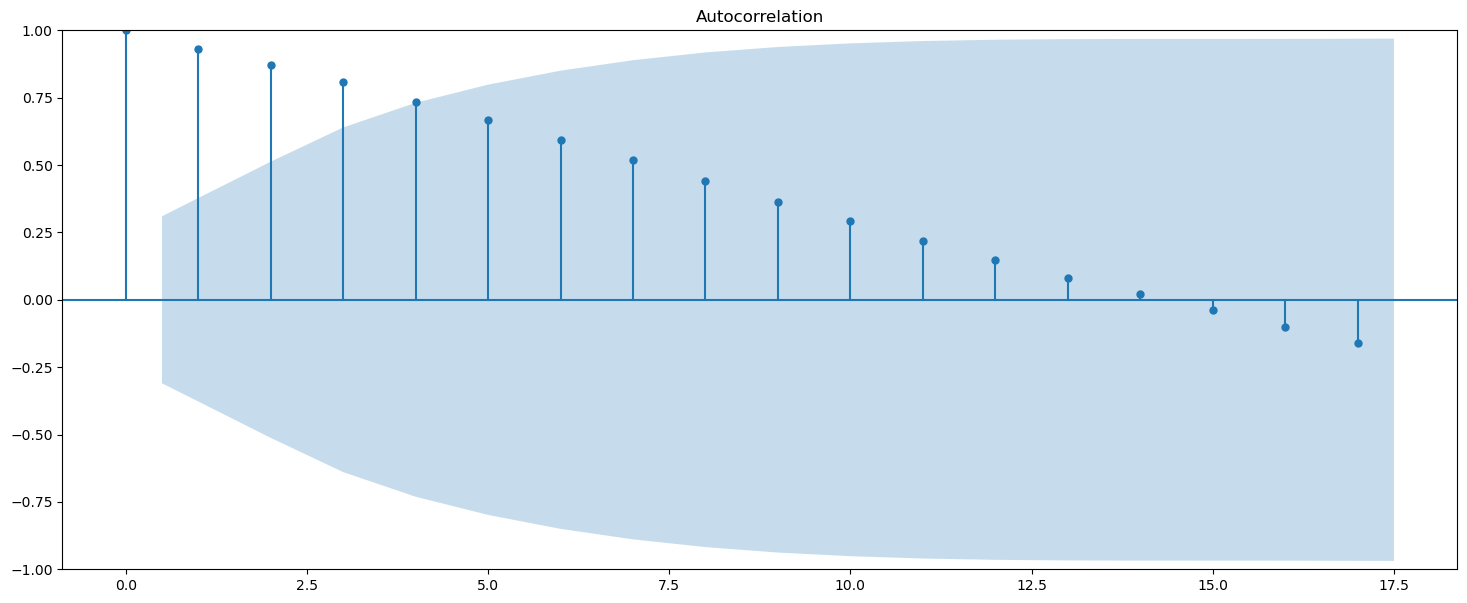

In [13]:
# plotting autocorrelations
plot_acf(sub1)

#Exporting viz
plt.savefig(os.path.join(path, 'Analysis','Visualizations', 'time_series_autocorrelations_gross.png'))

plt.show()

Based on the graph above, there are not enough lines above 50% confidence to warrant differencing. The data is stationary